In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Task 1: Measure of Central Tendency

In [2]:
df = pd.DataFrame({'movie':['a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c'], 'rating':[9,7,6,9,5,7,8,9,5]})

In [3]:
df

,movie,rating
0,a,9
1,b,7
2,c,6
3,a,9
4,b,5
5,c,7
6,a,8
7,b,9
8,c,5


In [4]:
df.mean(numeric_only=True)

rating    7.222222
dtype: float64

In [5]:
print(df['rating'].mean())

7.222222222222222


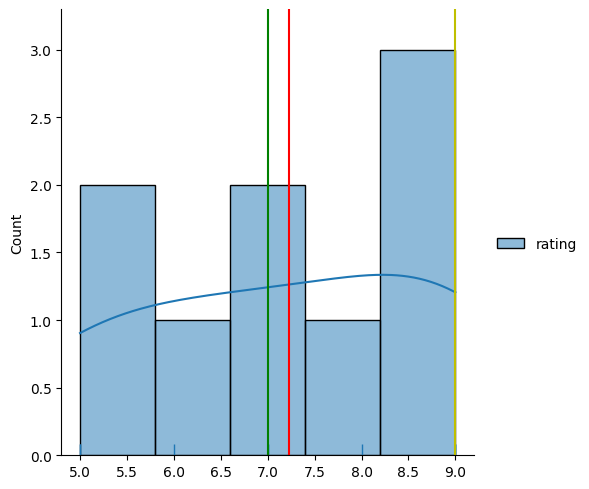

In [6]:
sns.displot(df, kde = True, rug = True)
plt.axvline(np.mean(df.rating), color = 'r', linestyle = '-')
plt.axvline(np.median(df.rating), color = 'g', linestyle = '-')
plt.axvline(df.rating.mode().values[0], color = 'y', linestyle = '-')
plt.show()

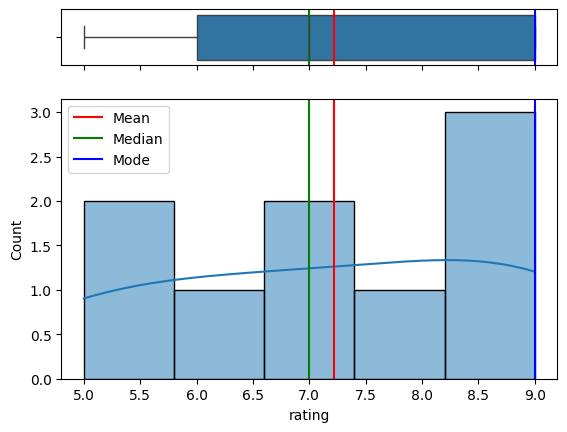

In [7]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios':(0.2, 1)})
mean = np.mean(df.rating)
median = np.median(df.rating)
mode = df.rating.mode().values[0]

sns.boxplot(data = df, x = 'rating', ax = ax_box)
ax_box.axvline(mean, color = 'r', linestyle = '-')
ax_box.axvline(median, color = 'g', linestyle = '-')
ax_box.axvline(mode, color = 'b', linestyle = '-')

sns.histplot(data = df, x = 'rating', ax = ax_hist, kde = True)
ax_hist.axvline(mean, color = 'r', linestyle = '-', label = 'Mean')
ax_hist.axvline(median, color = 'g', linestyle = '-', label = 'Median')
ax_hist.axvline(mode, color = 'b', linestyle = '-', label = 'Mode')

ax_hist.legend()
ax_box.set(xlabel = '')
plt.show()

In [8]:
# Variance
print(df.rating.var())

2.6944444444444446


In [9]:
# Standard Deviation
print(df.rating.std())

1.6414763002993509


In [10]:
mean = df.groupby(['movie'])['rating'].mean()
std = df.groupby(['movie'])['rating'].std()

In [11]:
mean

movie
a    8.666667
b    7.000000
c    6.000000
Name: rating, dtype: float64

In [12]:
std

movie
a    0.57735
b    2.00000
c    1.00000
Name: rating, dtype: float64

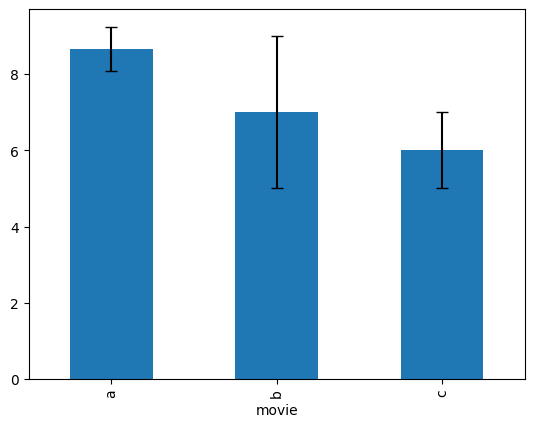

In [13]:
# Visualizing the relation between mean and standard deviation

fig, ax = plt.subplots()
mean.plot.bar(yerr = std, ax = ax, capsize = 4)
plt.show()

# Task 2: Measure of Spread

## Population

In [14]:
df1 = pd.DataFrame({'pop_sample':range(20)})

In [15]:
df1.sample(5).mean()

pop_sample    7.8
dtype: float64

In [16]:
df1.sample(10).mean()

pop_sample    10.1
dtype: float64

In [17]:
df1.mean()

pop_sample    9.5
dtype: float64

In [18]:
# Standard Error of the Mean

from scipy import stats
stats.sem(df1)

array([1.32287566])

## Interquartile Range

In [19]:
df2 = sns.load_dataset('tips')

In [20]:
df2

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


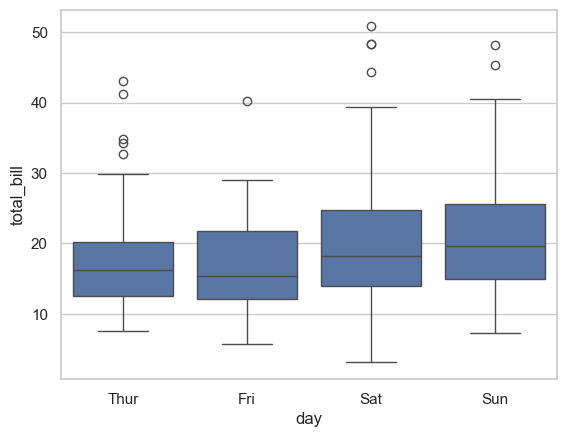

In [21]:
sns.set_theme(style = 'whitegrid')
ax = sns.boxplot(x = 'day', y = 'total_bill', data = df2)

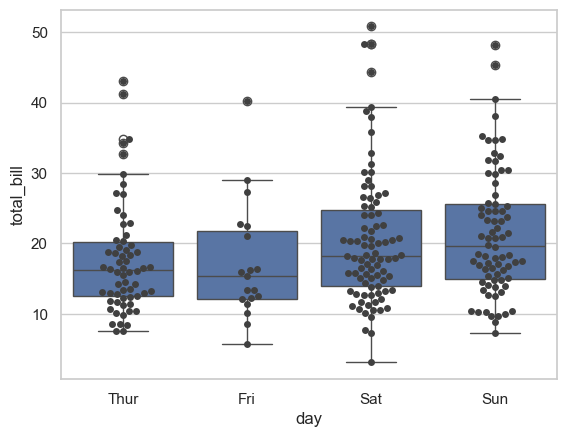

In [22]:
ax = sns.boxplot(x = 'day', y = 'total_bill', data = df2)
ax = sns.swarmplot(x = 'day', y = 'total_bill', data = df2, color = '0.25')

In [23]:
print(df2['total_bill'].quantile([0.05, 0.25, 0.5, 0.75]))

0.05     9.5575
0.25    13.3475
0.50    17.7950
0.75    24.1275
Name: total_bill, dtype: float64


In [24]:
# Interquartile Range
print(df2['total_bill'].quantile(0.75) - df2['total_bill'].quantile(0.25))

10.779999999999998


# Task 3: Correlations and Covariance

In [25]:
df3 = sns.load_dataset('iris')
df3

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


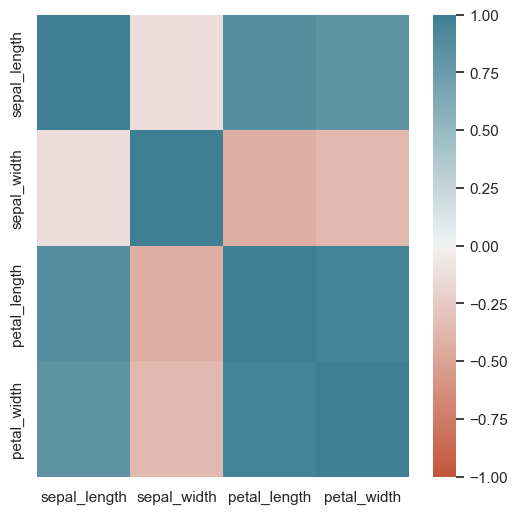

In [26]:
# Correlation

fig, ax = plt.subplots(figsize = (6,6))
corr = df3.select_dtypes(include=['number']).corr()
ax = sns.heatmap(corr, vmin = -1, vmax = 1, cmap = sns.diverging_palette(20, 220, as_cmap = True), ax = ax)
plt.show()

In [27]:
# Covariance

a = [11, 12, 22, 11]
b = [7, 8, 9, 10]
c = [10, 11, 22, 23]
arr = np.array([a, b, c])

In [28]:
cov_matrix = np.cov(arr, bias = True)

In [29]:
print(cov_matrix)

[[21.5   1.25 13.75]
 [ 1.25  1.25  6.25]
 [13.75  6.25 36.25]]


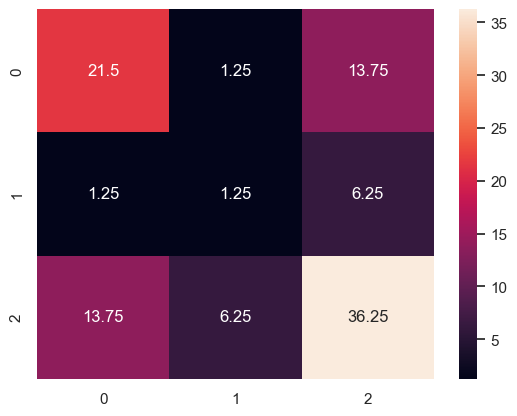

In [30]:
sns.heatmap(cov_matrix, annot = True, fmt = 'g')
plt.show()

#  Task 4: Distributions

In [31]:
# Skewness
df.skew(numeric_only=True)

rating   -0.23507
dtype: float64

In [32]:
# Kurtosis
df.kurtosis(numeric_only=True)

rating   -1.570351
dtype: float64

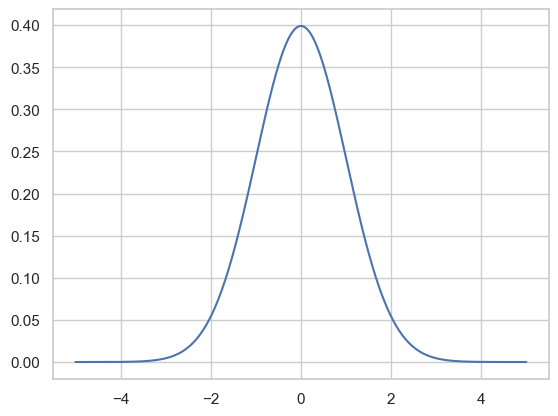

In [33]:
# Normal Distribution
norm1 = np.arange(-5, 5, 0.001)
mean = 0.0
std = 1.0
pdf = stats.norm.pdf(norm1, mean, std)
plt.plot(norm1, pdf)
plt.show()

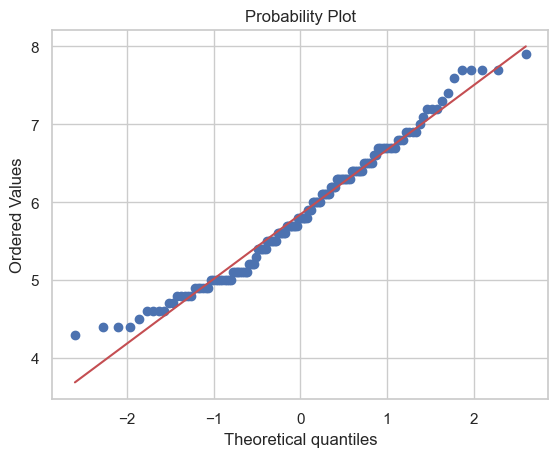

In [34]:
# Probability Plot
import pylab
stats.probplot(df3.sepal_length, plot = pylab)
plt.show()

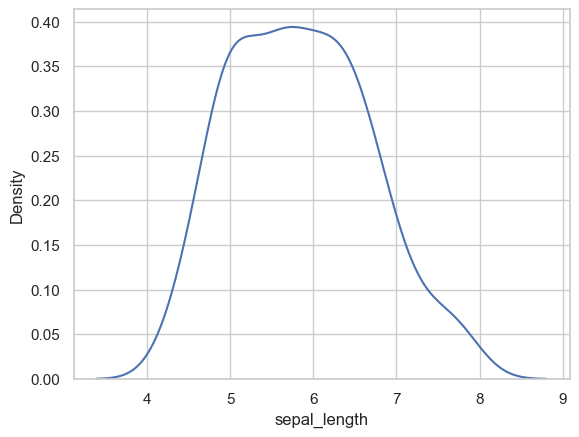

In [35]:
sns.kdeplot(df3.sepal_length)
plt.show()

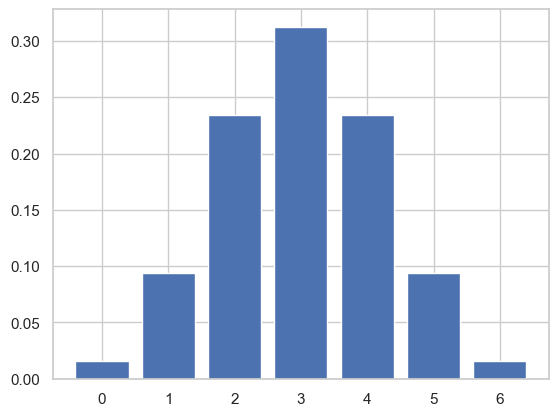

In [36]:
# Binomial Distribution 
from scipy.stats import binom
n = 6  # Number of trials
p = 0.5  # Probability for each of the trials
r_value = list(range(n+1))
dist = [binom.pmf(r, n, p) for r in r_value]
plt.bar(r_value, dist)
plt.show()

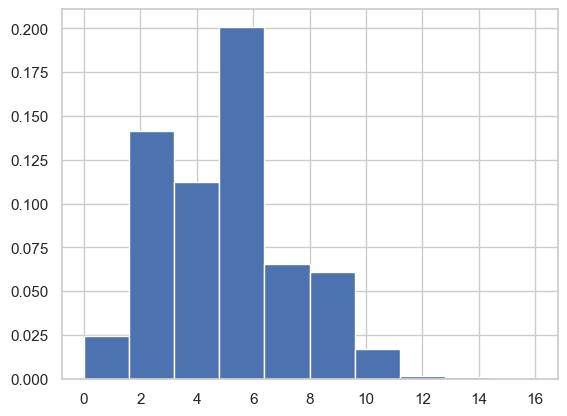

In [37]:
# Poisson Distribution
s = np.random.poisson(5, 10000)
count, bins, ignored = plt.hist(s, 10, density = True)
plt.show()

# Task 5: Central Limit Theorem & Confidence Interval

In [38]:
import statsmodels.stats.api as sms
sms.DescrStatsW(df3.sepal_length).tconfint_mean()

(np.float64(5.709732481507366), np.float64(5.976934185159301))

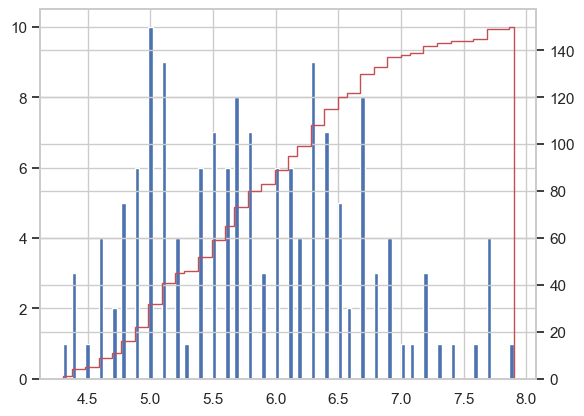

In [39]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
n, bins, patches = ax.hist(df3.sepal_length, bins = 100)
n, bins, patches = ax2.hist(df3.sepal_length, cumulative = 1, histtype = 'step', bins = 100, color = 'r')

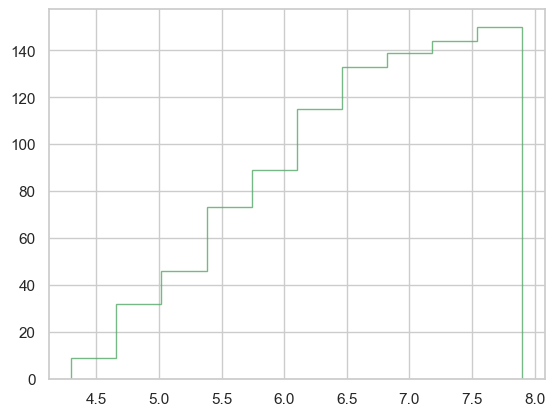

In [40]:
# Cumulative Distribution Function (CDF)
plt.hist(df3.sepal_length, cumulative = True, label = 'CDF', histtype = 'step', alpha = 0.8, color = 'g')
plt.show()

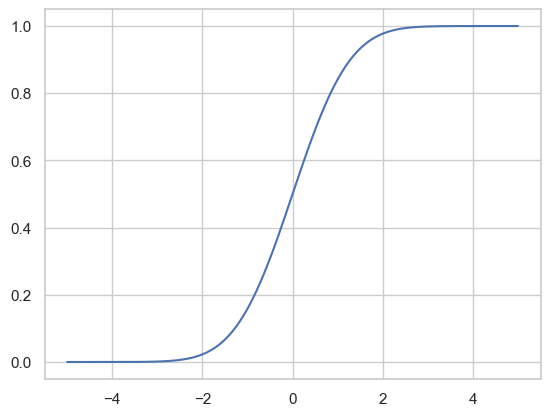

In [41]:
cdf = stats.norm.cdf(norm1)
plt.plot(norm1, cdf)
plt.show()

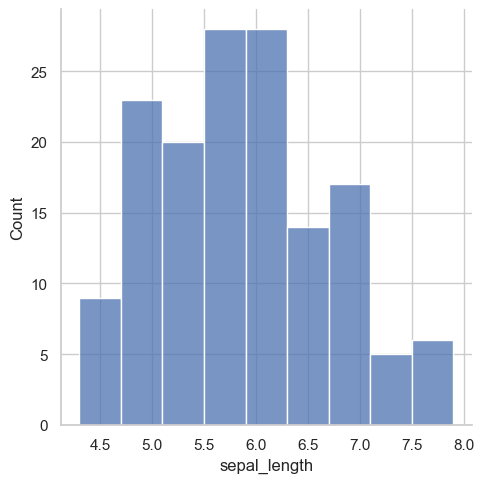

In [42]:
ax = sns.displot(df3.sepal_length)